# In-class assignment 2

Student name:

Student number:

Now that you have learned about Pandas and basics of data anlysis, we will ask you to apply them in this assignment.

* You are allowed to use your study materials (e.g., slides, literature, notebooks, solutions to weekly challenges) during the assignment. You are not allowed to use external sources.
* It is strictly forbidden to communicate with other students during the examination.
* When you are finished, double-check whether you answered all questions before uploading the assignment.
* Carefully read the instructions and questions in this notebook!

General instructions for answering the questions. Please read the instructions carefully:

* This assignment consists of a Jupyter Notebook with 2 questions. Read all the questions carefully. Make sure you save the notebook locally before starting to answer the questions. Rename this file according to the following structure: 
LastName_Surname_StudentID_Coursename
* Fill in your name and student number in the indicated space.
* To answer the questions, write your answers in this notebook where indicated. Note that you can create as many code and markdown cells as you need.
* Answer all questions and check upon completion if you really addressed all (sub-)questions.
* Use correct and complete sentences. Poorly or unclearly formulated answers will not be graded.
* Make sure to answer all questions in your own words.
* Do not provide any irrelevant information. If you provide more answers than instructed, only your first answer will be graded. If your correct answer also includes incorrect or irrelevant elements, these will lead to deduction of points.
* You can obtain a maximum of 10 points. The points you can obtain for each question are provided at the respective question.

Submission instructions:

* Please upload the html version of the notebook on Canvas. 
* To do so, when the assignment is fully finished (and all the code executed), in Jupyter Lab, select File --> Export Notebook As --> Export Notebook to HTML. An html file will be generated (and probably downloaded to your Downloads folder). Upload this html file to Canvas. This file will be also used for the plagiarism check.
* Make sure that the html file is names according to the following structure: 
LastName_Surname_StudentID_Coursename.html
* If you cannot generate an HTML version from your Notebook (if the option disappeared), upload a PDF instead to Canvas. Please tell your lecturer about it.

Good luck!


# General scenario

Together with this assignment, you received a file `horeca.csv`. This file contains some statistics on the hospitality sector in Amsterdam and was collected by the municipality of Amsterdam.


Imagine that you work at the Research and Statistics department of the municipality. Your boss asks you:

> Inspect the dataset. I am interetsed in the relationship between city part and number of employees. 
> Make an appropriate visualisation and show me some descriptives.

## Task 1: Inspect the structure of the data frame and make a plan (2 points)

First, import the data and get a generic overview about what variables you have at your disposal. Make sure to at least check how the dataset looks like, what columns it has, what data type these columns have and what information they give you. 

Once you have a feel for the dataset, write a short plan in which you outline what you will analyze to prepare the report.

In [1]:
# your code here

import pandas as pd

In [ ]:
# Load the data
df = pd.read_csv('horeca.csv')

In [ ]:
# Display the first 5 rows
df.head()

,year,category_code,category_description,citypart_code,citypart_name,branches_total,branches_12visitorsplus,employees
0,2018,0,rental holiday accomodations,A,Centrum,20,15,40
1,2018,0,rental holiday accomodations,E,West,5,5,5
2,2018,0,rental holiday accomodations,F,Nieuw-West,5,0,5
3,2018,0,rental holiday accomodations,K,Zuid,10,5,15
4,2018,0,rental holiday accomodations,M,Oost,5,0,5


In [ ]:
# Display column names
df.columns 

Index(['year', 'category_code', 'category_description', 'citypart_code',
       'citypart_name', 'branches_total', 'branches_12visitorsplus',
       'employees'],
      dtype='object')

In [18]:
#Display dtypes
# citypart is of type object and employees is of type int64
df.dtypes

year                        int64
category_code               int64
category_description       object
citypart_code              object
citypart_name              object
branches_total              int64
branches_12visitorsplus     int64
employees                   int64
dtype: object

In [17]:
# Display the number of missing values in each column
# There are two missing values in the column citypart
df.isna().sum()

year                       0
category_code              0
category_description       0
citypart_code              0
citypart_name              0
branches_total             0
branches_12visitorsplus    0
employees                  0
dtype: int64

It looks like the datastet has eight columns. For analysing the relationship between city part and number of employees I need the columns Citypart name or code and employees. I will take the following steps
1. If necessary, deal with missing values and wrong data types
2. Descriptive statistics for citypart (value_counts) and employees (mean,SD)
3. Descriptive statistics of employees grouped by the city part
4. Univariate visualisations for both variables
5. Bivariate visualtions

## Task 2: The report (8 points)
Create a nicely formatted report with code, graphs, tables and/or statistics, and Markdown Cells with explanations. For formatting of your answer, consider using headers (by starting the Markdown Cell with `###` for instance), bullet points etc.

*Note*: for the report make sure to include all the elements mentioned in task 1.

*report starts here*

In [10]:
#As I need to have cityparts for the analysis, I will drop the rows with missing values
df = df.dropna(subset=['citypart_name'])

In [ ]:
#Checking if dropna worked
df.isna().sum()

year                       0
category_code              0
category_description       0
citypart_code              0
citypart_name              0
branches_total             0
branches_12visitorsplus    0
employees                  0
dtype: int64

Data cleaning and preparation is done, now I can start the report

# Describing the data

## City districts

In [ ]:
#Checking the number of unique values in the column citypart_name
#There are 9 different city parts
df['citypart_name'].value_counts()

Centrum       40
West          40
Nieuw-West    40
Zuid          40
Oost          40
Noord         40
Zuidoost      40
Westpoort     26
Weesp         16
Name: citypart_name, dtype: int64

There are 9 districts included in the dataset. In most of them, there are 40 hospitality businesses, while in Westerpoort there are 26 and in Weest only 16.

## Employees in the hospitality business

In [ ]:
#Descriptive statistics for the column employees
df['employees'].describe()

count     322.000000
mean      856.133540
std      1507.444157
min         0.000000
25%        21.250000
50%       312.500000
75%       902.500000
max      8405.000000
Name: employees, dtype: float64

On average, each hospitality business employs 856 individuals (*SD* = 1507). This indicates that the number of employees is highly variable.

## Hospitality work in each district

In [14]:
df.groupby('citypart_name')['employees'].describe()

,count,mean,std,min,25%,50%,75%,max
citypart_name,,,,,,,,
Centrum,40.0,2738.500000,2960.533606,20.0,85.00,1495.0,5160.00,8405.0
Nieuw-West,40.0,367.125000,324.860695,5.0,30.00,300.0,672.50,905.0
Noord,40.0,333.625000,305.486135,5.0,20.00,370.0,522.50,1110.0
Oost,40.0,606.375000,530.751750,5.0,80.00,610.0,898.75,1825.0
Weesp,16.0,3.750000,11.180340,0.0,0.00,0.0,1.25,45.0
West,40.0,710.250000,600.274456,5.0,81.25,842.5,1078.75,2010.0
Westpoort,26.0,58.846154,63.770019,0.0,10.00,22.5,83.75,215.0
Zuid,40.0,1254.250000,1366.613609,10.0,60.00,997.5,1803.75,4290.0
Zuidoost,40.0,842.000000,1448.347777,0.0,15.00,247.5,781.25,5105.0


It seems that the average number of employees in a business differs substantially per district. City center has the largest businesses when it comes to the number of employees, while Weest has the smallest businesses on average. 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Centrum'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Nieuw-West'),
  Text(3, 0, 'Zuid'),
  Text(4, 0, 'Oost'),
  Text(5, 0, 'Noord'),
  Text(6, 0, 'Zuidoost'),
  Text(7, 0, 'Weesp'),
  Text(8, 0, 'Westpoort')])

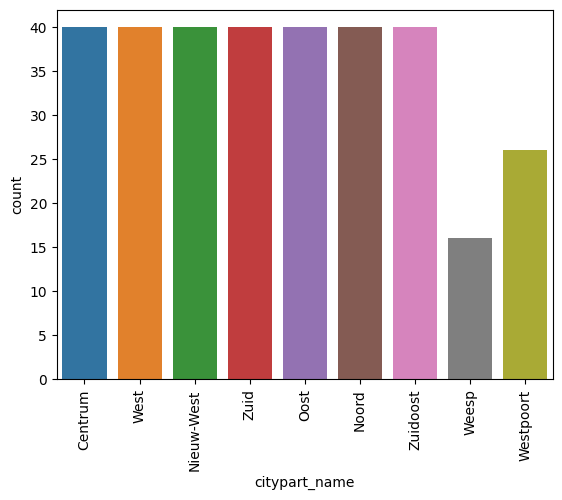

In [ ]:
# Boxplot
sns.countplot(x='citypart_name', data=df)
plt.xticks(rotation=90)

The graph above shows the distribution of hospitality business across the city. It highlights the large difference between Weest, Westerpoort and other disctricts.

<AxesSubplot:xlabel='employees', ylabel='Count'>

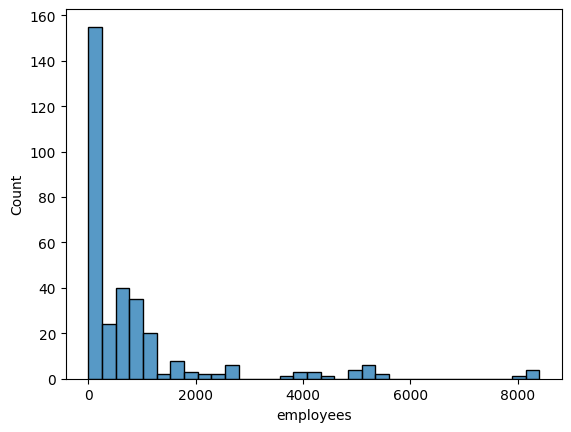

In [ ]:
# Histogram
sns.histplot(x = 'employees', data=df)


The histogram shows that the number of employees is right-skewed, with most of the values concentrated on the left side of the distribution.

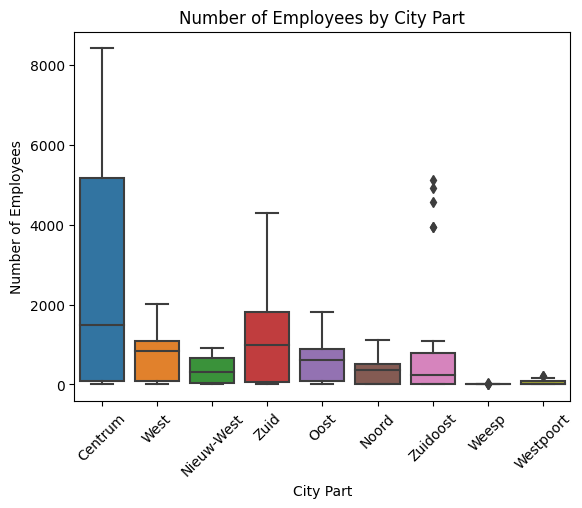

In [ ]:
#
sns.boxplot(x='citypart_name', y='employees', data=df)
plt.title('Number of Employees by City Part')
plt.xlabel('City Part')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

 The boxplot shows the distribution of the number of employees across different city parts. The city part with the highest average number of employees per business is "Centrum" followed by "Zuid". The city part with the lowest average number of employees is "Weesp."